In [1]:
# Using Environment Zeppelin

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.sql.types import *       # for datatype conversion
from pyspark.sql.functions import *   # for col() function
from pyspark.mllib.linalg import DenseVector
from pyspark.ml.feature import StandardScaler
from pyspark import SparkContext, SparkConf
import pyspark.ml
conf = SparkConf().setAppName("Linear SVM").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
sqlCtx = SQLContext(sc)
from pyspark.mllib.classification import SVMWithSGD
from pyspark.mllib.regression import LabeledPoint

In [2]:
import matplotlib
import matplotlib.cm as cm

**Weighted average computed with weights that corresponds to how the human eye perceives colors.**

In [3]:
def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

**List holding all 2400 images. There are 261 Mango images, 850 Banana images, 89 Papaya images and 1200 Coconut images. There is a 50/50 split between non-coconut and coconut images.**

In [4]:
x = []
count = 261
for name in (os.listdir("automated-clips/mango")):
    if(count > 0):
        if ("xml" not in name) and ("dominokeep" not in name):  
            st = "automated-clips/mango/"+name
            a = cv2.imread(st)
            x.append(a)
            count -= 1
        
        
count3 = 850
for name in (os.listdir("automated-clips/musa")):
    if(count3 > 0):
        if ("xml" not in name) and ("dominokeep" not in name):  
            st = "automated-clips/musa/"+name
            a = cv2.imread(st)
            x.append(a)
            count3 -= 1 

count4 = 89
for name in (os.listdir("automated-clips/papaya")):
    if(count4 > 0):
        if ("xml" not in name) and ("dominokeep" not in name):  
            st = "automated-clips/papaya/"+name
            a = cv2.imread(st)
            x.append(a)
            count4 -= 1


count2 = 1200
for name in (os.listdir("automated-clips/cocos")):
    if(count2 > 0):
        if ("xml" not in name) and ("dominokeep" not in name):  
            st = "automated-clips/cocos/"+name
            a = cv2.imread(st)
            x.append(a)
            count2 -= 1



In [5]:
len(x)

2400

**Convert all the images to greyscale to reduce computational time as the color is all pretty much green and so is not as important of a feature.** 

In [6]:
grey_x = []
for i in range(len(x)):
    image = x[i]
    grey = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
# get row number
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            grey[rownum][colnum] = weightedAverage(image[rownum][colnum])
    grey_x.append(grey)

**Example Color Image**

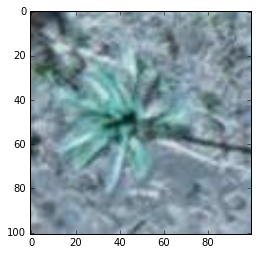

In [7]:
%matplotlib inline
plt.imshow(x[800])
plt.show()

**Example Greyscaled image**

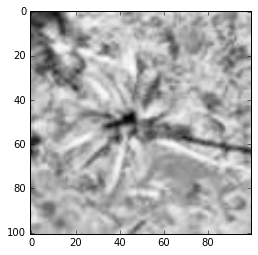

In [8]:
%matplotlib inline
plt.imshow(grey_x[800], cmap = matplotlib.cm.Greys_r)
plt.show()

**Create a list that holds the label of 1.0 for coconuts and 0.0 for non-coconut trees and their pixels.**

In [9]:
lp = []
lk = []
for i in range(len(grey_x)):
    grey_vec = np.hstack(grey_x[i])
    lk = []
#    grey_list = grey_vec.toList()
    if(i < 600 ):
        lk.extend((0.0,DenseVector(grey_vec)))
    else:
        lk.extend((1.0,DenseVector(grey_vec)))
    lp.append(lk)

**Create Pandas Dataframe to see the data**

In [10]:
df5 = pd.DataFrame.from_records(lp)

**Delete lists to try to save memory**

In [11]:
del(x)
del(grey)
del(grey_x)
del(lp)
del(lk)

**Label the label and feature columns**

In [12]:
df5.rename(columns={0:'label', 1:'features'}, inplace=True)

In [13]:
df5.head()

,label,features
0,0.0,"[84.744, 69.456, 88.054, 92.663, 49.446, 27.64..."
1,0.0,"[145.184, 177.782, 192.853, 189.935, 189.533, ..."
2,0.0,"[62.916, 78.617, 100.247, 125.638, 141.741, 13..."
3,0.0,"[30.077, 29.077, 29.077, 29.077, 29.077, 30.07..."
4,0.0,"[111.638, 104.236, 89.72, 73.389, 65.596, 63.8..."


**Convert to Spark DataFrame**

In [14]:
spDF3 = sqlCtx.createDataFrame(df5)

In [15]:
spDF3.select(["label", "features"]).show(1)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[84.7439999999999...|
+-----+--------------------+
only showing top 1 row



**Convert to Spark RDD**

In [16]:
rdd123 = spDF3.rdd

In [17]:
rdd123.take(1)

[Row(label=0.0, features=DenseVector([84.744, 69.456, 88.054, 92.663, 49.446, 27.642, 37.952, 37.561, 36.344, 36.942, 32.91, 26.91, 31.209, 36.209, 28.209, 14.312, 22.176, 29.67, 26.132, 30.213, 40.49, 32.18, 29.055, 50.653, 66.49, 62.686, 39.925, 28.523, 13.68, 14.381, 26.538, 11.022, 17.929, 29.619, 52.423, 90.515, 119.906, 117.4, 108.617, 116.41, 121.698, 106.1, 109.339, 109.339, 125.763, 149.763, 155.774, 170.165, 108.898, 92.588, 125.99, 152.99, 129.99, 170.99, 167.349, 160.349, 131.132, 120.73, 149.741, 153.339, 110.008, 110.008, 123.617, 92.09, 91.079, 93.965, 93.965, 114.965, 79.389, 53.389, 80.753, 42.764, 34.427, 29.036, 33.471, 46.667, 55.504, 31.7, 64.64, 62.608, 39.516, 29.0, 39.402, 63.402, 73.391, 76.391, 73.565, 64.967, 60.967, 101.358, 119.418, 120.809, 112.809, 67.211, 30.385, 41.695, 74.369, 68.565, 42.875, 20.875, 89.744, 56.456, 55.054, 57.663, 33.446, 29.642, 44.952, 45.561, 26.632, 30.942, 29.312, 22.312, 18.91, 21.91, 22.91, 19.312, 18.877, 23.67, 19.762, 17.213

**Create Spark Pipelined RDD**

In [18]:
lp2 = rdd123.map(lambda row : LabeledPoint(row[0], row[1]))

In [19]:
lp2.take(1)

[LabeledPoint(0.0, [84.744,69.456,88.054,92.663,49.446,27.642,37.952,37.561,36.344,36.942,32.91,26.91,31.209,36.209,28.209,14.312,22.176,29.67,26.132,30.213,40.49,32.18,29.055,50.653,66.49,62.686,39.925,28.523,13.68,14.381,26.538,11.022,17.929,29.619,52.423,90.515,119.906,117.4,108.617,116.41,121.698,106.1,109.339,109.339,125.763,149.763,155.774,170.165,108.898,92.588,125.99,152.99,129.99,170.99,167.349,160.349,131.132,120.73,149.741,153.339,110.008,110.008,123.617,92.09,91.079,93.965,93.965,114.965,79.389,53.389,80.753,42.764,34.427,29.036,33.471,46.667,55.504,31.7,64.64,62.608,39.516,29.0,39.402,63.402,73.391,76.391,73.565,64.967,60.967,101.358,119.418,120.809,112.809,67.211,30.385,41.695,74.369,68.565,42.875,20.875,89.744,56.456,55.054,57.663,33.446,29.642,44.952,45.561,26.632,30.942,29.312,22.312,18.91,21.91,22.91,19.312,18.877,23.67,19.762,17.213,23.006,22.582,16.077,14.675,23.49,33.615,41.925,52.153,32.68,14.011,21.527,14.527,25.619,39.423,66.113,100.504,122.596,119.389,119.008,1

**Train and test set with 80/20 split. Seed = 314**

In [20]:
train, test = lp2.randomSplit([.8,.2],seed = 314)

In [21]:
train.cache()

PythonRDD[12] at RDD at PythonRDD.scala:48

In [22]:
train.take(1)

[LabeledPoint(0.0, [84.744,69.456,88.054,92.663,49.446,27.642,37.952,37.561,36.344,36.942,32.91,26.91,31.209,36.209,28.209,14.312,22.176,29.67,26.132,30.213,40.49,32.18,29.055,50.653,66.49,62.686,39.925,28.523,13.68,14.381,26.538,11.022,17.929,29.619,52.423,90.515,119.906,117.4,108.617,116.41,121.698,106.1,109.339,109.339,125.763,149.763,155.774,170.165,108.898,92.588,125.99,152.99,129.99,170.99,167.349,160.349,131.132,120.73,149.741,153.339,110.008,110.008,123.617,92.09,91.079,93.965,93.965,114.965,79.389,53.389,80.753,42.764,34.427,29.036,33.471,46.667,55.504,31.7,64.64,62.608,39.516,29.0,39.402,63.402,73.391,76.391,73.565,64.967,60.967,101.358,119.418,120.809,112.809,67.211,30.385,41.695,74.369,68.565,42.875,20.875,89.744,56.456,55.054,57.663,33.446,29.642,44.952,45.561,26.632,30.942,29.312,22.312,18.91,21.91,22.91,19.312,18.877,23.67,19.762,17.213,23.006,22.582,16.077,14.675,23.49,33.615,41.925,52.153,32.68,14.011,21.527,14.527,25.619,39.423,66.113,100.504,122.596,119.389,119.008,1

**Logistic Regression Model**

In [23]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel

In [24]:
lr = LogisticRegressionWithLBFGS.train(train)

In [25]:
train.unpersist()

PythonRDD[12] at RDD at PythonRDD.scala:48

**Compute Accuracy and Testing Error**

In [26]:
test.cache()

PythonRDD[148] at RDD at PythonRDD.scala:48

In [27]:
test.take(1)

[LabeledPoint(0.0, [94.864,73.266,81.896,76.586,86.379,113.069,96.4,83.389,108.09,117.09,120.514,111.525,104.123,101.721,95.031,86.504,67.39,52.749,52.749,66.749,82.738,98.738,98.439,83.439,91.439,73.439,88.738,116.738,121.749,120.749,115.749,98.624,80.624,89.983,101.581,97.19,70.739,42.348,36.245,45.256,51.68,51.381,78.381,82.772,42.402,24.505,57.494,88.298,105.515,90.515,88.586,108.896,92.103,62.413,77.68,89.289,90.36,97.072,91.04,64.04,35.513,25.513,33.388,42.605,47.164,39.854,35.213,48.572,81.23,102.475,90.073,62.959,68.084,38.312,28.078,36.132,34.528,33.169,42.109,50.56,70.402,97.728,105.255,83.945,72.586,89.39,103.906,103.607,105.123,95.123,91.764,104.764,116.889,123.889,131.117,138.878,126.764,108.525,88.123,80.123,127.505,91.494,76.896,63.586,82.379,117.069,105.4,93.389,119.389,111.389,107.4,108.998,104.123,90.607,77.031,70.504,52.39,45.749,52.749,71.749,94.738,114.738,107.439,80.439,83.439,104.439,117.738,108.738,106.749,122.749,116.749,86.222,77.983,100.983,121.592,118.19,98.

In [28]:
labelsAndPreds2 = test.map(lambda p: (p.label, lr.predict(p.features))) 
testerr2 = labelsAndPreds2.filter(lambda lp: lp[0] != lp[1]).count() / float(test.count())
print("Testing Error = " + str(testerr2))
print("Accuracy: {}".format(1-testerr2))

Testing Error = 0.312101910828
Accuracy: 0.687898089172


In [29]:
test.unpersist()

PythonRDD[148] at RDD at PythonRDD.scala:48

In [35]:
del(lr)
del(labelsAndPreds2)
del(testerr2)

**Linear SVM Model**

In [ ]:
train.cache()

In [ ]:
train.take(1)

In [23]:
model = SVMWithSGD.train(train, iterations=100)

**Uncache Train to save memory and cache test to help bottom run faster**

In [24]:
train.unpersist()

PythonRDD[12] at RDD at PythonRDD.scala:48

In [25]:
test.cache()

PythonRDD[220] at RDD at PythonRDD.scala:48

In [26]:
test.take(1)

[LabeledPoint(0.0, [94.864,73.26599999999999,81.896,76.586,86.379,113.069,96.39999999999999,83.389,108.08999999999999,117.09,120.514,111.52499999999999,104.12299999999999,101.72099999999999,95.031,86.50399999999999,67.39,52.748999999999995,52.748999999999995,66.749,82.738,98.738,98.439,83.439,91.439,73.439,88.738,116.738,121.749,120.749,115.749,98.624,80.624,89.98299999999999,101.58099999999999,97.19,70.73899999999999,42.348,36.245,45.256,51.67999999999999,51.381,78.381,82.77199999999999,42.401999999999994,24.505,57.494,88.298,105.515,90.51499999999999,88.58599999999998,108.89599999999999,92.103,62.413,77.67999999999999,89.28899999999999,90.35999999999999,97.07199999999999,91.03999999999999,64.03999999999999,35.51299999999999,25.512999999999998,33.388,42.605000000000004,47.163999999999994,39.854,35.213,48.572,81.23,102.475,90.073,62.959,68.084,38.312,28.078,36.132,34.528,33.169,42.109,50.56,70.402,97.728,105.255,83.94500000000001,72.586,89.39,103.90599999999999,103.60699999999999,105.1

**Compute Accuracy and Testing Error**

In [27]:
labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features))) 
testerr = labelsAndPreds.filter(lambda lp: lp[0] != lp[1]).count() / float(test.count())
print("Testing Error = " + str(testerr))
print("Accuracy: {}".format(1-testerr))

Testing Error = 0.265392781316
Accuracy: 0.734607218684


In [28]:
test.unpersist()

PythonRDD[220] at RDD at PythonRDD.scala:48